In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [3]:
df = pd.read_csv("Country-data.csv")
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
pd.read_csv("data-dictionary.csv")

,Column Name,Description
0,country,Name of the country
1,child_mort,Death of children under 5 years of age per 100...
2,exports,Exports of goods and services. Given as %age o...
3,health,Total health spending as %age of Total GDP
4,imports,Imports of goods and services. Given as %age o...
5,Income,Net income per person
6,Inflation,The measurement of the annual growth rate of t...
7,life_expec,The average number of years a new born child w...
8,total_fer,The number of children that would be born to e...
9,gdpp,The GDP per capita. Calculated as the Total GD...


In [5]:
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [6]:
df.shape

(167, 10)

In [7]:
df['exports'] = df['exports']*df['gdpp']/100
df['imports'] = df['imports']*df['gdpp']/100
df['health'] = df['health']*df['gdpp']/100

<AxesSubplot:>

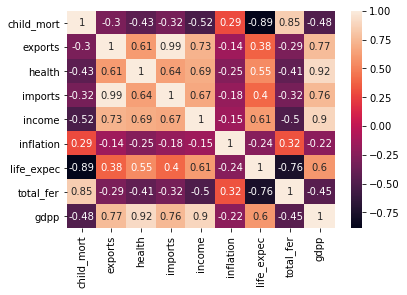

In [8]:
sns.heatmap(df.corr(),annot=True)

In [9]:
df1 = df.copy()
country = df['country']

In [10]:
df1.drop('country',inplace=True,axis=1)

In [11]:
df1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [12]:
sc = StandardScaler()
dfscaled = sc.fit_transform(df1)
dfscaled = pd.DataFrame(dfscaled,columns=df1.columns)
dfscaled

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-0.411011,-0.565040,-0.432276,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.350191,-0.439218,-0.313677,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.318526,-0.484826,-0.353720,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,-0.291375,-0.532363,-0.345953,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,-0.104331,-0.178771,0.040735,0.101732,-0.601749,0.704258,-0.541946,-0.041817
...,...,...,...,...,...,...,...,...,...
162,-0.225578,-0.336864,-0.501562,-0.342488,-0.738527,-0.489784,-0.852161,0.365754,-0.546913
163,-0.526514,-0.199393,-0.219310,-0.287205,-0.033542,3.616865,0.546361,-0.316678,0.029323
164,-0.372315,-0.361463,-0.538488,-0.377572,-0.658404,0.409732,0.286958,-0.661206,-0.637754
165,0.448417,-0.392166,-0.550596,-0.418479,-0.658924,1.500916,-0.344633,1.140944,-0.637754


In [13]:
pca = PCA()
pcafit = pca.fit_transform(dfscaled)
pcafit

array([[-2.63557499e+00,  1.47226739e+00, -5.49488868e-01, ...,
        -4.02106673e-01,  1.52246778e-02,  2.14526223e-02],
       [-2.42055643e-02, -1.42989187e+00, -1.41232909e-02, ...,
         2.62749660e-01,  3.75846547e-04, -3.38831728e-02],
       [-4.59557398e-01, -6.75495376e-01,  9.59354680e-01, ...,
         2.26680500e-01,  4.17041908e-02, -3.26636757e-02],
       ...,
       [-5.94449148e-01, -1.07633467e+00,  5.28874919e-01, ...,
         1.27676529e-01, -3.75433341e-02, -7.38600849e-02],
       [-1.80237235e+00,  5.88729402e-01,  1.18085099e+00, ...,
        -1.30849147e-01,  1.19704727e-02, -6.63306309e-03],
       [-2.64450479e+00,  1.57195347e+00, -1.74684997e-01, ...,
        -7.51162884e-01,  5.94382085e-03,  3.54065192e-02]])

In [14]:
variation= pca.explained_variance_ratio_
variation

array([5.89372984e-01, 1.84451685e-01, 9.91147170e-02, 6.07227801e-02,
       3.02917253e-02, 2.45982702e-02, 9.39743701e-03, 1.55641971e-03,
       4.93981394e-04])

<BarContainer object of 9 artists>

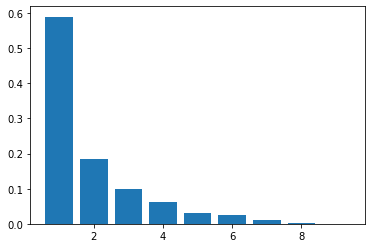

In [15]:
plt.bar(range(1,len(variation)+1),variation)

In [17]:
varcumsum = np.cumsum(variation)*100
varcumsum 

array([ 58.93729842,  77.38246694,  87.29393863,  93.36621664,
        96.39538917,  98.85521619,  99.79495989,  99.95060186,
       100.        ])

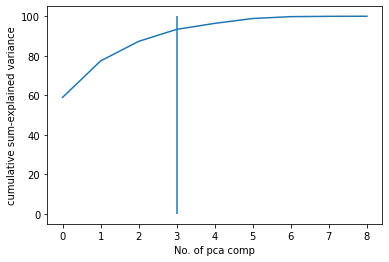

In [19]:
#scree plot
plt.plot(varcumsum)
plt.xlabel('No. of pca comp')
plt.ylabel('cumulative sum-explained variance')
plt.vlines(x=3,ymax=100,ymin=0)

In [20]:
table = pd.DataFrame({'features':df1.columns,'PC1':pca.components_[0],'pc2':pca.components_[1],'pc3':pca.components_[2]})
table.head()

,features,PC1,pc2,pc3
0,child_mort,-0.316392,0.476267,-0.150012
1,exports,0.342887,0.397311,-0.030574
2,health,0.358535,0.155053,-0.075703
3,imports,0.344865,0.370781,-0.072174
4,income,0.380041,0.128384,0.145764


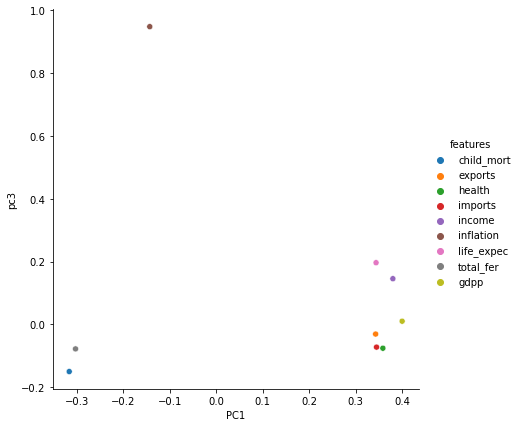

In [24]:

sns.pairplot(data=table,x_vars='PC1',y_vars='pc3',hue='features',height=6)

In [25]:
finalpca = PCA(n_components=3)

In [26]:
finaldf = finalpca.fit_transform(dfscaled)

In [27]:
finaldf = pd.DataFrame(finaldf,columns=['pc1','pc2','pc3'])
finaldf.head()

,pc1,pc2,pc3
0,-2.635575,1.472267,-0.549489
1,-0.024206,-1.429892,-0.014123
2,-0.459557,-0.675495,0.959355
3,-2.722630,2.172332,0.600215
4,0.648597,-1.023437,-0.257430


<AxesSubplot:>

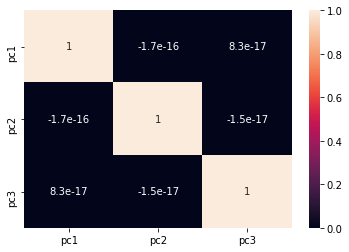

In [28]:
sns.heatmap(finaldf.corr(),annot=True)

In [30]:
finaldf = pd.concat([country,finaldf],axis=1)
finaldf

,country,country,pc1,pc2,pc3
0,Afghanistan,Afghanistan,-2.635575,1.472267,-0.549489
1,Albania,Albania,-0.024206,-1.429892,-0.014123
2,Algeria,Algeria,-0.459557,-0.675495,0.959355
3,Angola,Angola,-2.722630,2.172332,0.600215
4,Antigua and Barbuda,Antigua and Barbuda,0.648597,-1.023437,-0.257430
...,...,...,...,...,...
162,Vanuatu,Vanuatu,-1.175210,-0.275652,-0.667131
163,Venezuela,Venezuela,-0.314228,-0.016266,3.680273
164,Vietnam,Vietnam,-0.594449,-1.076335,0.528875
165,Yemen,Yemen,-1.802372,0.588729,1.180851
